In [34]:
%matplotlib inline

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model
import math

# Lorenz Attractor

In [36]:
data = pd.read_csv('CapDimData.dat')

In [37]:
data.head()

,x,y,z
0,-12.139,-18.644,30.953
1,-12.243,-18.796,31.057
2,-12.348,-18.948,31.165
3,-12.454,-19.100,31.276
4,-12.561,-19.252,31.391


In [38]:
lorenz = np.asarray(data)

In [39]:
lorenz.shape

(14000, 3)

In [40]:
lorenz

array([[-12.139, -18.644,  30.953],
       [-12.243, -18.796,  31.057],
       [-12.348, -18.948,  31.165],
       ..., 
       [-16.571, -22.507,  40.015],
       [-16.666, -22.566,  40.229],
       [-16.76 , -22.621,  40.445]])

In [41]:
# Project Lorenz trajectoey down to 2 dimensions
lorenz_proj = lorenz[:, (0,2)]

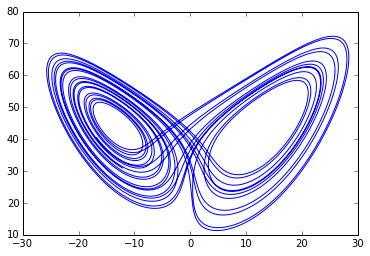

In [42]:
plt.plot(lorenz_proj[:,0], lorenz_proj[:,1])

# Capacity Dimension

In [43]:
x_min = min(lorenz_proj[:,0])
x_max = max(lorenz_proj[:,0])
z_min = min(lorenz_proj[:,1])
z_max = max(lorenz_proj[:,1])

In [44]:
print x_min, x_max, z_min, z_max

-25.715 28.442 11.331 72.277


In [45]:
# Count the number of boxes required to cover the phase space trajectory, i.e. N(epsilon)
# Assumes a 2d trajectory
def count_boxes(trajectory_2d, epsilon):
    x_min = min(trajectory_2d[:,0])
    x_max = max(trajectory_2d[:,0])
    z_min = min(trajectory_2d[:,1])
    z_max = max(trajectory_2d[:,1])

    total_boxes_x = int(math.ceil((x_max - x_min) / epsilon))+1
    total_boxes_z = int(math.ceil((z_max - z_min) / epsilon))+1
    
    grid = np.zeros((total_boxes_x, total_boxes_z))
    
    for t in trajectory_2d:
        x_curr, z_curr = t[0], t[1]
        x_i = int(math.ceil((x_curr - x_min) / epsilon))
        x_j = int(math.ceil((z_curr - z_min) / epsilon))
        
        grid[x_i, x_j] = 1
        
    # Compute and return frobenius norm
    return sum(sum(grid))

In [46]:
epsilon = 100.0
region = []
print 'epsilon, 1 / epsilon, ln(1/epsilon), count, ln(count)'
while epsilon > 0.003:
    count = count_boxes(lorenz_proj, epsilon)
    region.append([math.log(1.0 / epsilon), math.log(count)])
    print epsilon, (1.0 / epsilon), math.log(1.0 / epsilon), count, math.log(count)
    epsilon /= 2
region = np.vstack(region)

epsilon, 1 / epsilon, ln(1/epsilon), count, ln(count)
100.0 0.01 -4.60517018599 3.0 1.09861228867
50.0 0.02 -3.91202300543 6.0 1.79175946923
25.0 0.04 -3.21887582487 10.0 2.30258509299
12.5 0.08 -2.52572864431 23.0 3.13549421593
6.25 0.16 -1.83258146375 65.0 4.1743872699
3.125 0.32 -1.13943428319 214.0 5.36597601502
1.5625 0.64 -0.446287102628 715.0 6.57228254269
0.78125 1.28 0.246860077932 2254.0 7.7204616946
0.390625 2.56 0.940007258491 5786.0 8.66319648554
0.1953125 5.12 1.63315443905 10165.0 9.22670572606
0.09765625 10.24 2.32630161961 13181.0 9.48653167771
0.048828125 20.48 3.01944880017 13964.0 9.54423786822
0.0244140625 40.96 3.71259598073 13995.0 9.54645540195
0.01220703125 81.92 4.40574316129 13998.0 9.54666974125
0.006103515625 163.84 5.09889034185 14000.0 9.5468126086
0.0030517578125 327.68 5.79203752241 14000.0 9.5468126086


In [47]:
region

array([[-4.60517019,  1.09861229],
       [-3.91202301,  1.79175947],
       [-3.21887582,  2.30258509],
       [-2.52572864,  3.13549422],
       [-1.83258146,  4.17438727],
       [-1.13943428,  5.36597602],
       [-0.4462871 ,  6.57228254],
       [ 0.24686008,  7.72046169],
       [ 0.94000726,  8.66319649],
       [ 1.63315444,  9.22670573],
       [ 2.32630162,  9.48653168],
       [ 3.0194488 ,  9.54423787],
       [ 3.71259598,  9.5464554 ],
       [ 4.40574316,  9.54666974],
       [ 5.09889034,  9.54681261],
       [ 5.79203752,  9.54681261]])

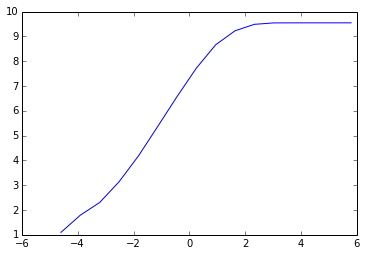

In [48]:
plt.plot(region[:,0], region[:,1])

In [49]:
def get_regression_region(region, start, end):
    df = pd.DataFrame(region, index=region[:,0])
    df_splice = df[start:end]
    return np.array(df_splice)

In [50]:
regression_region = get_regression_region(region, start=-3, end=2)

In [51]:
regression_region

array([[-2.52572864,  3.13549422],
       [-1.83258146,  4.17438727],
       [-1.13943428,  5.36597602],
       [-0.4462871 ,  6.57228254],
       [ 0.24686008,  7.72046169],
       [ 0.94000726,  8.66319649],
       [ 1.63315444,  9.22670573]])

In [52]:
regr = linear_model.LinearRegression()
regr.fit_intercept = True

In [53]:
# Reshape numpy vector so sklearn will play nice
X = np.reshape(regression_region[:,0], (len(regression_region[:,0]), 1))
y = np.reshape(regression_region[:,1], (len(regression_region[:,1]), 1))

regr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [54]:
d_cap = regr.coef_[0][0]

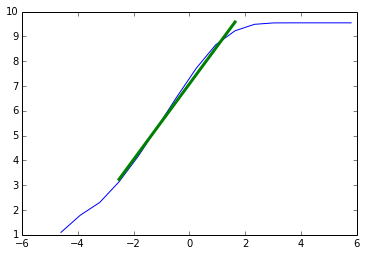

In [55]:
plt.plot(region[:,0], region[:,1])
plt.plot(regression_region[:,0], regr.intercept_ + d_cap * regression_region[:,0], linewidth=3)

# Capacity Dimension (Actual)

In [56]:
print d_cap

1.52543043999


# Reconstruction Space

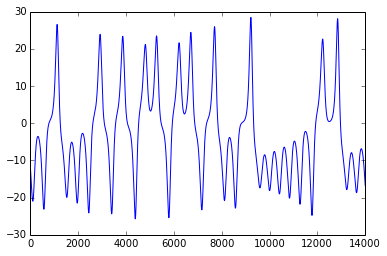

In [59]:
plt.plot(lorenz_proj[:,0])

In [57]:
def time_delay_embedding(data, tau, m):
    embeddings = []
    for i in range(2*tau, len(data)):
        embedding = np.zeros(m)
        for j in range(m):
            embedding[j] = data[i - j*tau]
        embeddings.append(embedding)
    return np.vstack(embeddings)

In [118]:
embeddings = time_delay_embedding(lorenz_proj[:,0], tau=18, m=4)

In [141]:
col1 = np.reshape(embeddings[:,0], (len(embeddings[:,0]), 1))
col2 = np.reshape(embeddings[:,3], (len(embeddings[:,3]), 1))
embeddings_proj = np.hstack((col1, col2)) 

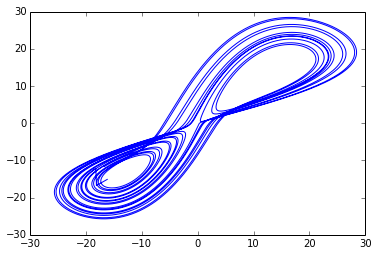

In [143]:
plt.plot(embeddings_proj[:,0], embeddings_proj[:,1])

In [144]:
epsilon = 100.0
region = []
print 'epsilon, 1 / epsilon, ln(1/epsilon), count, ln(count)'
while epsilon > 0.003:
    count = count_boxes(embeddings_proj, epsilon)
    region.append([math.log(1.0 / epsilon), math.log(count)])
    print epsilon, (1.0 / epsilon), math.log(1.0 / epsilon), count, math.log(count)
    epsilon /= 2
region = np.vstack(region)

epsilon, 1 / epsilon, ln(1/epsilon), count, ln(count)
100.0 0.01 -4.60517018599 3.0 1.09861228867
50.0 0.02 -3.91202300543 6.0 1.79175946923
25.0 0.04 -3.21887582487 9.0 2.19722457734
12.5 0.08 -2.52572864431 17.0 2.83321334406
6.25 0.16 -1.83258146375 42.0 3.73766961828
3.125 0.32 -1.13943428319 127.0 4.84418708646
1.5625 0.64 -0.446287102628 405.0 6.00388706711
0.78125 1.28 0.246860077932 1324.0 7.1884127365
0.390625 2.56 0.940007258491 3736.0 8.22577079935
0.1953125 5.12 1.63315443905 7883.0 8.97246382106
0.09765625 10.24 2.32630161961 11304.0 9.33291192436
0.048828125 20.48 3.01944880017 13029.0 9.4749329212
0.0244140625 40.96 3.71259598073 13718.0 9.52646411806
0.01220703125 81.92 4.40574316129 13893.0 9.53914039515
0.006103515625 163.84 5.09889034185 13956.0 9.54366480231
0.0030517578125 327.68 5.79203752241 13964.0 9.54423786822


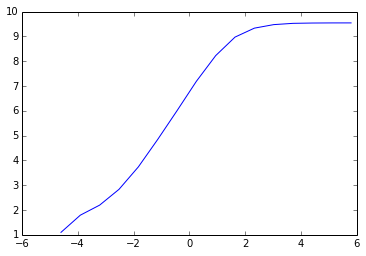

In [145]:
plt.plot(region[:,0], region[:,1])

In [146]:
regression_region = get_regression_region(region, start=-3, end=2)

In [147]:
regression_region

array([[-2.52572864,  2.83321334],
       [-1.83258146,  3.73766962],
       [-1.13943428,  4.84418709],
       [-0.4462871 ,  6.00388707],
       [ 0.24686008,  7.18841274],
       [ 0.94000726,  8.2257708 ],
       [ 1.63315444,  8.97246382]])

In [148]:
regr = linear_model.LinearRegression()
regr.fit_intercept = True

In [149]:
# Reshape numpy vector so sklearn will play nice
X = np.reshape(regression_region[:,0], (len(regression_region[:,0]), 1))
y = np.reshape(regression_region[:,1], (len(regression_region[:,1]), 1))

regr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [150]:
d_cap = regr.coef_[0][0]

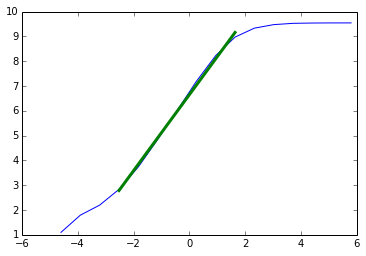

In [151]:
plt.plot(region[:,0], region[:,1])
plt.plot(regression_region[:,0], regr.intercept_ + d_cap * regression_region[:,0], linewidth=3)

# Capacity Dimension (Reconstruction)

In [154]:
print d_cap

1.53225442885
